# Exploratory Data Analysis (EDA) on Economic Indicator
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

##1. Installation Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from functools import reduce

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index7')

Mounted at /content/drive


In [ ]:
import_df = pd.read_csv('Wage_growth.csv') #Dataset file
import_df.head(5)

,DATE,A576RC1
0,1959-01-01,252.3
1,1959-02-01,253.6
2,1959-03-01,256.1
3,1959-04-01,258.6
4,1959-05-01,260.8


In [ ]:
recession = pd.read_csv('Recession.csv')
recession.head(5)

,DATE,JHDUSRGDPBR
0,1967-10-01,0.0
1,1968-01-01,0.0
2,1968-04-01,0.0
3,1968-07-01,0.0
4,1968-10-01,0.0


## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

In [ ]:
df = import_df.copy()
df['DATE'] = pd.to_datetime(df['DATE'])
df.columns = ['DATE', 'wage']

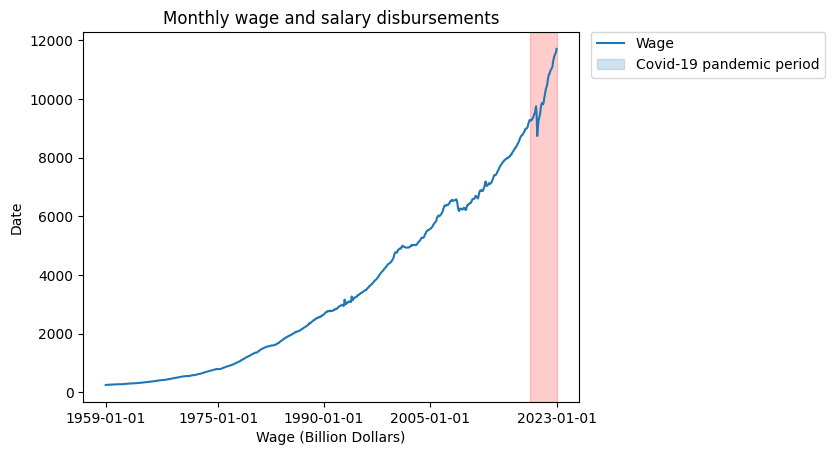

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='DATE', y='wage', data=df)
ax.axvspan('2019-04-01', '2023-01-01', color='red', alpha=0.2)

plt.title('Monthly wage and salary disbursements')
plt.xlabel('Wage (Billion Dollars)')
plt.ylabel('Date')
plt.xticks(['1959-01-01', '1975-01-01','1990-01-01', '2005-01-01', '2023-01-01'])
plt.legend(['Wage', 'Covid-19 pandemic period'], bbox_to_anchor=(1.01, 1.02))
plt.show()

In [ ]:
recession.columns = ['DATE', 'recession']
recession['DATE'] = pd.to_datetime(recession['DATE'])
start = []
end = []
for i, date in enumerate(recession.DATE):
  if i == 0 or i==len(recession.DATE)-1:
    continue
  if (recession.recession[i-1] == 0) & (recession.recession[i] == 1):
    start.append(date)
  elif (recession.recession[i] == 1) & (recession.recession[i+1] == 0):
    end.append(date)
print(start)
print(end)

[Timestamp('1969-04-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1979-04-01 00:00:00'), Timestamp('1981-04-01 00:00:00'), Timestamp('1989-10-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2007-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00')]
[Timestamp('1970-10-01 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('1980-04-01 00:00:00'), Timestamp('1982-04-01 00:00:00'), Timestamp('1991-01-01 00:00:00'), Timestamp('2001-07-01 00:00:00'), Timestamp('2009-04-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]


In [ ]:
Reces = pd.DataFrame()
Reces['start'] = start
Reces['end'] = end
Reces

,start,end
0,1969-04-01,1970-10-01
1,1973-10-01,1975-01-01
2,1979-04-01,1980-04-01
3,1981-04-01,1982-04-01
4,1989-10-01,1991-01-01
5,2001-01-01,2001-07-01
6,2007-10-01,2009-04-01
7,2020-01-01,2020-04-01


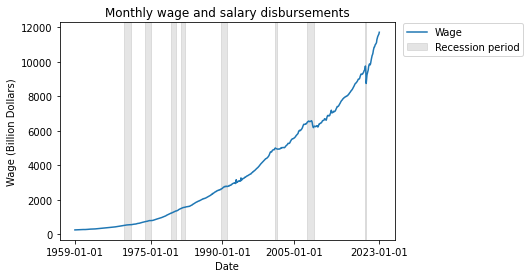

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x='DATE', y='wage', data=df)
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)

plt.title('Monthly wage and salary disbursements')
plt.ylabel('Wage (Billion Dollars)')
plt.xlabel('Date')
plt.xticks(['1959-01-01', '1975-01-01','1990-01-01', '2005-01-01', '2023-01-01'])
plt.legend(['Wage', 'Recession period'], bbox_to_anchor=(1.4, 1.02))
plt.show()

In [ ]:
df['months'] = round((df['DATE'] - datetime.datetime(1959, 1, 1)) / np.timedelta64(1, 'M')).astype('int')
recession['months'] = round((recession['DATE'] - datetime.datetime(1959, 1, 1)) / np.timedelta64(1, 'M')).astype('int')
df['wage_b'] = df['wage'] - 252.3

In [ ]:
start = []
end = []
for i, date in enumerate(recession.DATE):
  if i == 0 or i==len(recession.DATE)-1:
    continue
  if (recession.recession[i-1] == 0) & (recession.recession[i] == 1):
    start.append(recession.months[i])
  elif (recession.recession[i] == 1) & (recession.recession[i+1] == 0):
    end.append(recession.months[i])
print(start)
print(end)

[123, 177, 243, 267, 369, 504, 585, 732]
[141, 192, 255, 279, 384, 510, 603, 735]


In [ ]:
months = df['months'].to_numpy()
wage = df['wage_b'].to_numpy()

In [ ]:
from scipy.optimize import curve_fit

# Fit the function a * np.exp(b * t) + c to x and y
popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, months, wage, p0=(10,0.01,200))

1622.4067841756353 0.002652580677118856 -1954.6214842573665


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


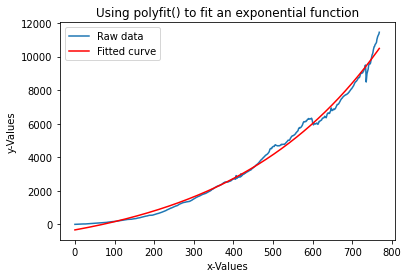

In [ ]:
a = popt[0]
b = popt[1]
c = popt[2]
x_fitted = months
y_fitted = a * np.exp(b * x_fitted) + c
print(a, b, c)
ax = plt.axes()
sns.lineplot(months, wage, label='Raw data')
sns.lineplot(x_fitted, y_fitted, color='red', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_xlabel('x-Values')
#ax.set_xlim(0,300)
#ax.set_ylim(0,10000)
ax.legend()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


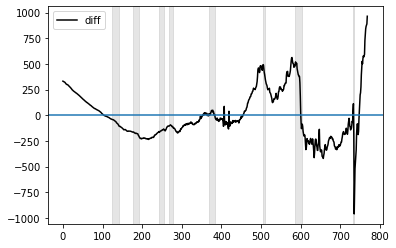

In [ ]:
diff = wage - y_fitted
ax = plt.axes()
sns.lineplot(x_fitted, diff, color='black', label='diff')
ax.axhline(0)
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


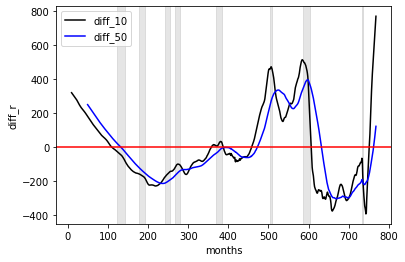

In [ ]:
df['diff'] = pd.Series(diff)
df['diff_r'] = df['diff'].rolling(10).mean()
df['diff_rr'] = df['diff'].rolling(50).mean()
ax = plt.axes()
sns.lineplot(df['months'], df['diff_r'], color='black', label='diff_10')
sns.lineplot(df['months'], df['diff_rr'], color='blue', label='diff_50')
ax.axhline(0, color='red')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


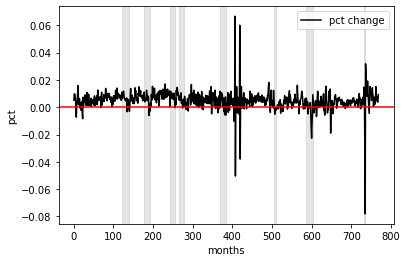

In [ ]:
df['pct'] = df.wage.pct_change()
ax = plt.axes()
sns.lineplot(df['months'], df['pct'], color='black', label='pct change')
ax.axhline(0, color='red')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


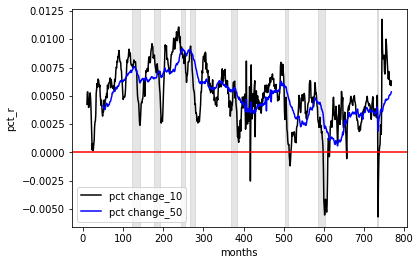

In [ ]:
df['pct_r'] = df['pct'].rolling(10).mean()
df['pct_rr'] = df['pct'].rolling(50).mean()
ax = plt.axes()
sns.lineplot(df['months'], df['pct_r'], color='black', label='pct change_10')
sns.lineplot(df['months'], df['pct_rr'], color='blue', label='pct change_50')
ax.axhline(0, color='red')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)

In [ ]:
df['pct'] = df.wage.pct_change()
df

,DATE,wage,pct
0,1959-01-01,252.3,NaN
1,1959-02-01,253.6,0.005153
2,1959-03-01,256.1,0.009858
3,1959-04-01,258.6,0.009762
4,1959-05-01,260.8,0.008507
...,...,...,...
764,2022-09-01,11450.6,0.007913
765,2022-10-01,11507.0,0.004926
766,2022-11-01,11553.8,0.004067
767,2022-12-01,11596.8,0.003722


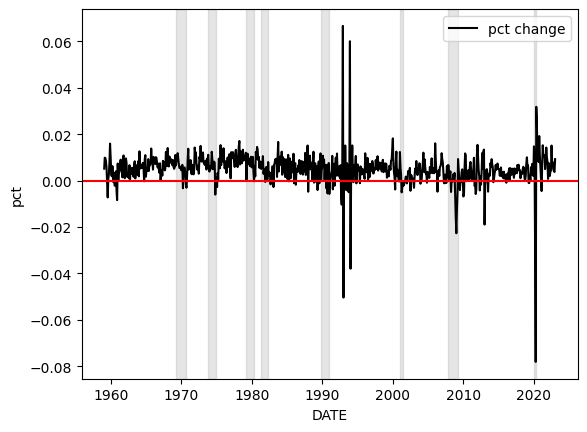

In [ ]:
ax = plt.axes()
sns.lineplot(x=df['DATE'], y=df['pct'], color='black', label='pct change')
ax.axhline(0, color='red')
for i in range(len(start)):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.show()

In [ ]:
df2 = df.copy()
df2.index = df2.DATE + dt.timedelta(days=3*30)
df2 = df2.drop('DATE', axis=1)
df2['pct'] = df2['wage'].pct_change(periods=24)

li = []
for i in range(len(Reces)):
  li.append(df2.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
test = reduce(lambda x,y:x+y, li)
print(test.value_counts())
df2['recession'] = test.values.copy()
df2

0    672
1     97
Name: DATE, dtype: int64


,wage,pct,recession
DATE,,,
1959-04-01,252.3,NaN,0
1959-05-02,253.6,NaN,0
1959-05-30,256.1,NaN,0
1959-06-30,258.6,NaN,0
1959-07-30,260.8,NaN,0
...,...,...,...
2022-11-30,11450.6,0.203958,0
2022-12-30,11507.0,0.187096,0
2023-01-30,11553.8,0.179043,0


<Axes: >

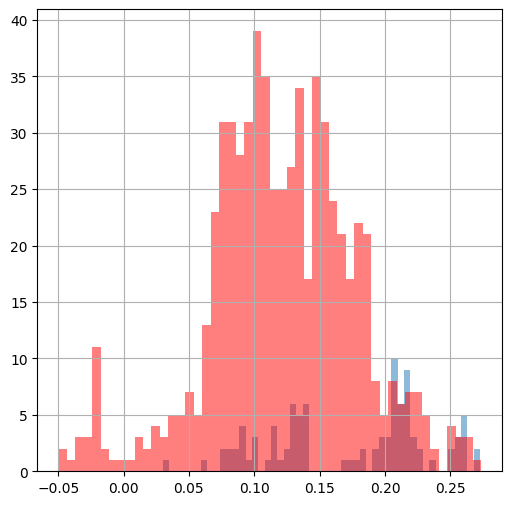

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
df2[df2['recession'] == 1]['pct'].hist(bins=50, alpha=0.5)
df2[df2['recession'] == 0]['pct'].hist(bins=50, color='red', alpha=0.5)

In [ ]:
import scipy.stats as stats
import numpy as np

# Creating data groups
data_group1 = df2[df2['recession'] == 1]['pct'].dropna().to_numpy()
data_group2 = df2[df2['recession'] == 0]['pct'].dropna().to_numpy()

print(f'Variance with recession: {np.var(data_group1)}, Variance without recession: {np.var(data_group2)}') #check for equal variance
print(f'Mean with recession: {np.mean(data_group1)}, Mean without recession: {np.mean(data_group2)}')


# Conducting two-sample ttest
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True) #p-value<0.05 reject null -> not equal mean -> statistically different

Variance with recession: 0.0009826373298660097, Variance without recession: 0.0010015341457715583
Mean with recession: 0.07708284376818678, Mean without recession: 0.05990669573341327


Ttest_indResult(statistic=4.9906136891982635, pvalue=7.477195410347007e-07)

In [ ]:
def calc_TP_FP_rate(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_true[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

df2['predict'] = df2['pct'].apply(lambda x: int(x>0.068))

# Test function

calc_TP_FP_rate(df2['recession'], df2['predict'])

(0.6185567010309279, 0.3869047619047619)

In [ ]:
# Containers for true positive / false positive rates
tp_rates = []
fp_rates = []

threshold = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for t in threshold:
    
    df2['predict'] = df2['pct'].apply(lambda x: int(x>t))
    tp_rate, fp_rate = calc_TP_FP_rate(df2['recession'], df2['predict'])
        
    tp_rates.append(tp_rate)
    fp_rates.append(fp_rate)

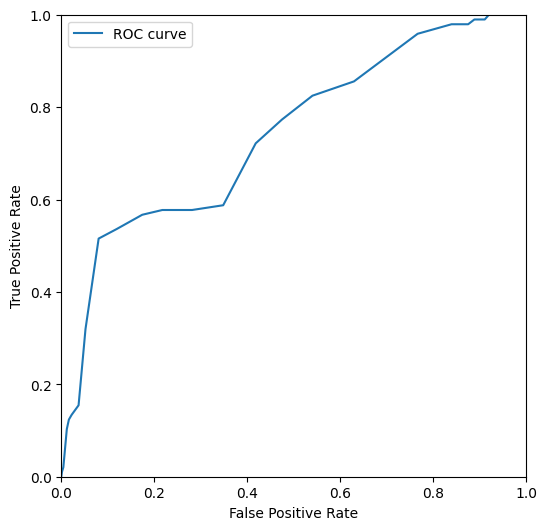

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fp_rates, tp_rates, label='ROC curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.legend();

In [ ]:
from sklearn.metrics import auc
print(auc(fp_rates, tp_rates))

0.6689294918998527


In [ ]:
for k in range(1,13):
  for i in range(1,25):
    df3 = df.copy()
    df3.index = df3.DATE + dt.timedelta(days=k*30)
    df3 = df3.drop('DATE', axis=1)
    df3['pct'] = df3['wage'].pct_change(periods=i)

    li = []
    for j in range(len(Reces)):
      li.append(df3.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[j]['start'])&(x < Reces.loc[j]['end']))))
    test = reduce(lambda x,y:x+y, li)
    df3['recession'] = test.values.copy()
    data_group1 = df3[df3['recession'] == 1]['pct'].dropna().to_numpy()
    data_group2 = df3[df3['recession'] == 0]['pct'].dropna().to_numpy()
    # Conducting two-sample ttest
    p = stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True).pvalue
    if p < 0.01:
      print(f'for {k} months shift, pct periods = {i} is the first to be < 0.01: {p}')
      break

for 1 months shift, pct periods = 12 is the first to be < 0.01: 0.005647420678143966
for 2 months shift, pct periods = 8 is the first to be < 0.01: 0.005496394166977365
for 3 months shift, pct periods = 7 is the first to be < 0.01: 0.004629949226691423
for 4 months shift, pct periods = 6 is the first to be < 0.01: 0.005873206869392711
for 5 months shift, pct periods = 5 is the first to be < 0.01: 0.0033637438843158087
for 6 months shift, pct periods = 4 is the first to be < 0.01: 0.004585692127903463
for 7 months shift, pct periods = 3 is the first to be < 0.01: 0.007788988031371613
for 8 months shift, pct periods = 3 is the first to be < 0.01: 0.004040424041254052
for 9 months shift, pct periods = 3 is the first to be < 0.01: 0.001907178132535191
for 10 months shift, pct periods = 2 is the first to be < 0.01: 0.007957378481809992
for 11 months shift, pct periods = 2 is the first to be < 0.01: 0.003301428893755347
for 12 months shift, pct periods = 2 is the first to be < 0.01: 0.000250

0    670
1     99
Name: DATE, dtype: int64


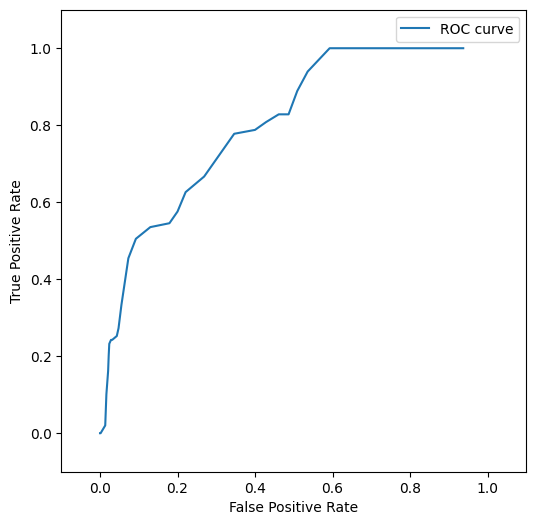

In [ ]:
df4 = df.copy()
df4.index = df4.DATE + dt.timedelta(days=10*30)
df4 = df4.drop('DATE', axis=1)
df4['pct'] = df4['wage'].pct_change(periods=36)

li = []
for i in range(len(Reces)):
  li.append(df4.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
test = reduce(lambda x,y:x+y, li)
print(test.value_counts())
df4['recession'] = test.values.copy()
df4
# Containers for true positive / false positive rates
tp_rates = []
fp_rates = []

threshold = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for t in threshold:
    
    df4['predict'] = df4['pct'].apply(lambda x: int(x>t))
    tp_rate, fp_rate = calc_TP_FP_rate(df4['recession'], df4['predict'])
        
    tp_rates.append(tp_rate)
    fp_rates.append(fp_rate)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fp_rates, tp_rates, label='ROC curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
ax.legend();

In [ ]:
print(auc(fp_rates, tp_rates))

0.7393864013266997


In [ ]:
max = [0,0, -9999]
for k in range(10,13): # tried 9 - 12
  for i in range(36,60):  # tried 12-59
    df4 = df.copy()
    df4.index = df4.DATE + dt.timedelta(days=k*30)
    df4 = df4.drop('DATE', axis=1)
    df4['pct'] = df4['wage'].pct_change(periods=i)

    li = []
    for j in range(len(Reces)):
      li.append(df4.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[j]['start'])&(x < Reces.loc[j]['end']))))
    test = reduce(lambda x,y:x+y, li)
    df4['recession'] = test.values.copy()
    df4
    # Containers for true positive / false positive rates
    tp_rates = []
    fp_rates = []

    threshold = np.linspace(0,1,num=100)

    # Find true positive / false positive rate for each threshold
    for t in threshold:
        
        df4['predict'] = df4['pct'].apply(lambda x: int(x>t))
        tp_rate, fp_rate = calc_TP_FP_rate(df4['recession'], df4['predict'])
            
        tp_rates.append(tp_rate)
        fp_rates.append(fp_rate)
    au = auc(fp_rates, tp_rates)
    if au > max[2]:
      max[0] = k
      max[1] = i
      max[2] = au
  print(k)
print(max)

10
11
12
[10, 36, 0.7393864013266997]


In [ ]:
for k in range(5,16):
  for i in range(32,41):
    df3 = df.copy()
    df3.index = df3.DATE + dt.timedelta(days=k*30)
    df3 = df3.drop('DATE', axis=1)
    df3['pct'] = df3['wage'].pct_change(periods=i)

    li = []
    for j in range(len(Reces)):
      li.append(df3.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[j]['start'])&(x < Reces.loc[j]['end']))))
    test = reduce(lambda x,y:x+y, li)
    df3['recession'] = test.values.copy()
    data_group1 = df3[df3['recession'] == 1]['pct'].dropna().to_numpy()
    data_group2 = df3[df3['recession'] == 0]['pct'].dropna().to_numpy()
    # Conducting two-sample ttest
    p = stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True).pvalue
    if p < 0.01:
      print(f'for {k} months shift, pct periods = {i}, p-value: {p}')

for 5 months shift, pct periods = 32, p-value: 2.9850637824778807e-21
for 5 months shift, pct periods = 33, p-value: 1.6007166355662061e-21
for 5 months shift, pct periods = 34, p-value: 1.1458489224127869e-21
for 5 months shift, pct periods = 35, p-value: 1.3174329215457428e-21
for 5 months shift, pct periods = 36, p-value: 1.5581645859718581e-21
for 5 months shift, pct periods = 37, p-value: 1.7899006811358013e-21
for 5 months shift, pct periods = 38, p-value: 1.9437676410413357e-21
for 5 months shift, pct periods = 39, p-value: 1.8779288137864124e-21
for 5 months shift, pct periods = 40, p-value: 1.6160243962313706e-21
for 6 months shift, pct periods = 32, p-value: 6.364867585216257e-22
for 6 months shift, pct periods = 33, p-value: 5.388110789864496e-22
for 6 months shift, pct periods = 34, p-value: 4.0773630693963603e-22
for 6 months shift, pct periods = 35, p-value: 4.710448012847608e-22
for 6 months shift, pct periods = 36, p-value: 5.748420010826714e-22
for 6 months shift, pct 